In [1]:
import pandas as pd
import numpy as np

In [2]:
data  = pd.read_csv(r'C:\Users\Tejas\Desktop\Capstone\DatasetsCleaned\UniformClasses\Clean\davidson2017.csv')

In [4]:
data = data[['Text','Class']]

<AxesSubplot:xlabel='Class', ylabel='count'>

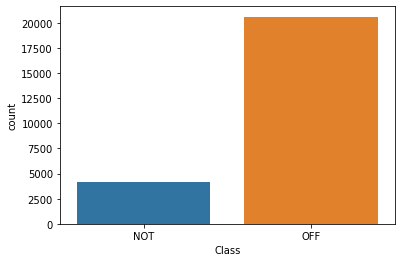

In [6]:
import seaborn as sns
sns.countplot('Class',data=data)

In [7]:
text = data['Text']
label = data['Class']

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(text, label, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

18587 18587
6196 6196


In [12]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english', ngram_range=(1,5))
x_train_vectorizer=count.fit_transform(x_train)

In [13]:
x_test_vectorizer=count.transform(x_test)
# x_train_vectorizer.toarray()

In [14]:
count.vocabulary_

{'rt': 258383,
 'lynchiewcvb': 194379,
 'big': 25827,
 'night': 221187,
 'wcvb': 347462,
 'martha': 199804,
 'coakleycharli': 62071,
 'baker': 20046,
 'debat': 76811,
 'bruinsminnesota': 49180,
 'wild': 352224,
 'world': 356403,
 'seri': 286931,
 'game': 115198,
 'rt lynchiewcvb': 269205,
 'lynchiewcvb big': 194380,
 'big night': 26145,
 'night wcvb': 221453,
 'wcvb martha': 347463,
 'martha coakleycharli': 199805,
 'coakleycharli baker': 62072,
 'baker debat': 20059,
 'debat bruinsminnesota': 76812,
 'bruinsminnesota wild': 49181,
 'wild world': 352270,
 'world seri': 356560,
 'seri game': 286935,
 'rt lynchiewcvb big': 269206,
 'lynchiewcvb big night': 194381,
 'big night wcvb': 26149,
 'night wcvb martha': 221454,
 'wcvb martha coakleycharli': 347464,
 'martha coakleycharli baker': 199806,
 'coakleycharli baker debat': 62073,
 'baker debat bruinsminnesota': 20060,
 'debat bruinsminnesota wild': 76813,
 'bruinsminnesota wild world': 49182,
 'wild world seri': 352271,
 'world seri gam

In [15]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()

x_train_tfidf = tfidf.fit_transform(x_train_vectorizer)

x_train_tfidf.toarray()
x_test_tfidf = tfidf.transform(x_test_vectorizer)

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [17]:
model_vectorizer= MultinomialNB().fit(x_train_vectorizer, y_train)
prediction_vectorizer=model_vectorizer.predict(x_test_vectorizer)
print(confusion_matrix(y_test,prediction_vectorizer))
print (classification_report(y_test, prediction_vectorizer))

[[   3  348   10]
 [   1 4777   16]
 [   2  677  362]]
              precision    recall  f1-score   support

           0       0.50      0.01      0.02       361
           1       0.82      1.00      0.90      4794
           2       0.93      0.35      0.51      1041

    accuracy                           0.83      6196
   macro avg       0.75      0.45      0.47      6196
weighted avg       0.82      0.83      0.78      6196



In [18]:
model_tfidf= MultinomialNB().fit(x_train_tfidf, y_train)
prediction_tfidf=model_tfidf.predict(x_test_tfidf)
print (classification_report(y_test, prediction_tfidf))
print(confusion_matrix(y_test,prediction_tfidf))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       361
           1       0.78      1.00      0.88      4794
           2       0.97      0.03      0.06      1041

    accuracy                           0.78      6196
   macro avg       0.58      0.34      0.31      6196
weighted avg       0.77      0.78      0.69      6196

[[   0  360    1]
 [   0 4794    0]
 [   0 1008   33]]


c:\Users\Tejas\Desktop\Capstone\hate-speech-project\hsp\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Tejas\Desktop\Capstone\hate-speech-project\hsp\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Tejas\Desktop\Capstone\hate-speech-project\hsp\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [20]:
import xgboost as xgb
xgb_model=xgb.XGBClassifier(
        learning_rate=0.1,
        max_depth=7,
        n_estimators=80,
        use_label_encoder=False,
        eval_metric='auc' )

In [21]:
xgb_model_vectorizer = xgb_model.fit(x_train_vectorizer, y_train)
xgb_predictions_vectorizer=xgb_model_vectorizer.predict(x_test_vectorizer)
print(confusion_matrix(y_test,xgb_predictions_vectorizer))
print (classification_report(y_test, xgb_predictions_vectorizer))

[[  56  237   68]
 [  45 4454  295]
 [   3   43  995]]
              precision    recall  f1-score   support

           0       0.54      0.16      0.24       361
           1       0.94      0.93      0.93      4794
           2       0.73      0.96      0.83      1041

    accuracy                           0.89      6196
   macro avg       0.74      0.68      0.67      6196
weighted avg       0.88      0.89      0.88      6196



In [22]:
xgb_model = xgb_model.fit(x_train_tfidf, y_train)
xgb_predictions=xgb_model.predict(x_test_tfidf)
print(confusion_matrix(y_test,xgb_predictions))
print (classification_report(y_test, xgb_predictions))

[[  77  217   67]
 [  57 4449  288]
 [   3   45  993]]
              precision    recall  f1-score   support

           0       0.56      0.21      0.31       361
           1       0.94      0.93      0.94      4794
           2       0.74      0.95      0.83      1041

    accuracy                           0.89      6196
   macro avg       0.75      0.70      0.69      6196
weighted avg       0.89      0.89      0.88      6196



In [8]:
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,SpatialDropout1D
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.models import Sequential

In [17]:
x_train = x_train.astype('str')

In [18]:
max_words = 50000
max_len = 300
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [19]:
model = Sequential()
model.add(Embedding(max_words, 100, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 100)          5000000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 300, 100)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 5,080,501
Trainable params: 5,080,501
Non-trainable params: 0
_________________________________________________________________


In [20]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

stop = EarlyStopping(
    monitor='val_accuracy', 
    mode='max',
    patience=5
)

checkpoint= ModelCheckpoint(
    filepath='./',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [22]:
y_train = y_train.astype('str')

In [23]:
history=model.fit(sequences_matrix,y_train,batch_size=1024,epochs=10,
          validation_split=0.2,callbacks=[stop,checkpoint])

Epoch 1/10


UnimplementedError:  Cast string to float is not supported
	 [[node binary_crossentropy/Cast (defined at C:\Users\Tejas\AppData\Local\Temp/ipykernel_23700/309624302.py:1) ]] [Op:__inference_train_function_4116]

Function call stack:
train_function


In [36]:
test_sequences = tokenizer.texts_to_sequences(x_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [37]:
accr = model.evaluate(test_sequences_matrix,y_test)

194/194 [==============================] - 14s 75ms/step - loss: -2.2699 - accuracy: 0.7737


In [38]:
lstm_prediction=model.predict(test_sequences_matrix)

In [54]:
print(confusion_matrix(y_test,lstm_prediction))

[[   0  361    0]
 [   0 4794    0]
 [   0 1041    0]]


In [51]:
print (classification_report(y_test, lstm_prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       361
           1       0.77      1.00      0.87      4794
           2       0.00      0.00      0.00      1041

    accuracy                           0.77      6196
   macro avg       0.26      0.33      0.29      6196
weighted avg       0.60      0.77      0.68      6196



c:\Users\Tejas\Desktop\Capstone\hate-speech-project\hsp\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Tejas\Desktop\Capstone\hate-speech-project\hsp\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Tejas\Desktop\Capstone\hate-speech-project\hsp\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera